# **Credit Card Fraud Detection**

## Importing Libraries

In [43]:

#!pip install skimpy
#!pip install summarytools
#!pip install polars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
data= pd.read_csv("C:\creditcard.csv")

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Summary of data and Basic Checks

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
!pip install skimpy

In [ ]:
!pip install pandas-profiling

In [ ]:
import polars as pl
from pandas_profiling import ProfileReport
from skimpy import skim

In [16]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Time[int64],Mean (sd) : 23997.3 (12423.7)min < med < max:0.0 < 28992.0 < 38241.0IQR (CV) : 21974.5 (1.9),"19,693 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACxklEQVR4nO3dQU7bQBSA4TcNhAmJbIVEyY4LIHWBxMYH6LKH7RFYsGDNDdghRVGiuFgxJt2UqpUgJDOezjzr/7ZowJJ/ReOYZ5vdbidA6r7EPgDgECexDwDdYYwZiEjfcfl2t9s9f/RDQkUrjDGDyWTyPcuyscv69Xq9NMb8+ChWQkVb+lmWjYuieM7zvDpm4Wq1snd3d+PFYtEXEUJFeHmeV7PZ7KfD0sG+H3IxBRUIFSoQKlQgVKhAqFCBUKECX0/hD887S9nr6+tpm8fzN0KFiPjfWarr2jZNc1VV1a2IuHyPuheh4o3znSURkcfHx/HDw8P5y8tLL8TBESr+4Xpnablc7r2z5IuLKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUOHTUZSQz7xE+zzOV9ApUl97Qw39zEu0y+d8hZ4i9fXZJ2rQZ16idc7nK/QUqa+DplBDPfMSYbicr9BTpL64mIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMAz/BOT8it0YiLUhKT+Cp2Ykg5V6xiMzzjIaDSaFUWxTvEVOjEFDbVpmlMRyYwxLsvtxcXFtzzPhy6LY43BtDEOcnZ2dpviK3RiChZqWZandV1/vby87PV6vaM/Heq6tiJydXNzcz+dTtfHrI08BtPZcZCYgoW63W5PrLXn19fX1Xw+Xx67/u2kWWtrjWMwXRwHiSn4HnU4HEZ5E5zntkOEUe+kJH0x5cp32yHCqHdqOhmq77aDUe/0dDLUN67bjt/YLyak06H68NjjdvbuUEyE+g6fPW6X7w7FRKjv8Nnj8l1oGIS6h8sel+9Cw+Df/KACoUIFQoUKhAoVDrqYWq1W9thfvNlsrIhIWZb26enp/H+u1/q3tR637/pD+voFD9OS1KOrHzEAAAAASUVORK5CYII="">",0(0.0%)
2,V1[float64],Mean (sd) : -0.2 (1.8)min < med < max:-30.6 < -0.2 < 2.0IQR (CV) : 2.1 (-0.1),"34,906 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7ElEQVR4nO3ZO07DQBRG4Ts8jI3QjBxL3gQ7cE/LYlkCRQrq7CBdlChylIdFHqZAIChCsJMQ/uh8rX3lWxxZssfVdW3Af3dx6gWA37g69QI4H865xMyiluOvdV0vtl0kVByEcy7JsuzRe5+2mZ9MJmPn3NO2WAkVhxJ579OiKBYhhKrJYFmWcbfbTUejUWRmhIrjCyFUeZ7PW4wmP13kYwoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSrk69AP4P51xiZlHLcb/ZbK4Puc9XhAoze480y7JH733aZn65XMbr9fq+qqpnM5sfeD1CxafIe58WRbEIIVRNh/v9ftrr9W5Xq9XlMZYjVHwTQqjyPG/8RhyPx8kx9vnAxxQkECokECokECokECokECokECok8B/1zOxxDHrUI9B97QzVOReb2c0f7IL9xZ1O5yGEcNd08OMIdDgcvrR58HQ6jc3MZrNZPBgMbpvMlmUZ77rnDdxwWG0U1GtqAAAAAElFTkSuQmCC"">",0(0.0%)
3,V2[float64],Mean (sd) : 0.1 (1.5)min < med < max:-41.0 < 0.1 < 16.7IQR (CV) : 1.3 (0.0),"34,906 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB6UlEQVR4nO3dQYrbQBBG4arEUaRZdCMEukRuoEPMYXOEWfgEvoF3BmPa2GMlttxZZD0k1shj/cP79oVq8RA0NLTnnA2Yuy+PXgD4H4tHL4BpuXtlZsXI8d8559OU+0yFUD8Rd6+apnkOIdRj5vf7/c7df84xVkL9XIoQQt113SnG2N8ymFIql8tlvd1uCzMjVNxfjLFv2/Z1xGg1+TIT4TAFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCbwuPTPuXplZMXI8XK/Xb1PuMxeEOiPuXjVN8xxCqMfMn8/nchiGH33fv5jZmGfQZ4tQ56UIIdRd151ijP2tw+v1ul6tVk+Xy+XrPZZ7JEKdoRhj37btzX/E3W5X3WOfOeAwBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgn/vObn7qWZff+AXfD3hv4ipVSOGT4cDqWZ2fF4LDebzdMtsymlchiGhZkFdx/z+ff6lXN+8w7uH6KoWMiVAyIcAAAAAElFTkSuQmCC"">",0(0.0%)
4,V3[float64],Mean (sd) : 0.7 (1.5)min < med < max:-31.1 < 0.8 < 4.1IQR (CV) : 1.2 (0.5),"34,906 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB1klEQVR4nO3dvU4CQRSG4TP+4EDMTBYSbsI7oLf1Yr0ECwpr7oCOQDZLQDbys1YYLQCZBfUj79MuJ0zxNlvsGVdVlQH/3dVfHwD4iZu/PgAuh3OuaWaNxPH3qqoWux4SKk7COdfsdDpPIYQsZX46nebOueddsRIqTqURQsh6vd4ixlgeM1gUhe/3+9lkMmmYGaHi/GKMZbfbfUsYbe57yMsUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJ

In [17]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35742  │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 31     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA % ┃ mean      ┃ sd      ┃ p0     ┃ p25       ┃ p50      ┃ p75     ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Time         │   0 │    0 │     24000 │   12420 │      0 │     12280 │    28990 │   34260 │ 38240 │ ▃▂▁▂▅▇ │  │
│ │ V1           │   0 │    0 │   -0.2084 │   1.837 │ -30.55 │   -0.9601 │  -0.2345 │   1.162 │  1.96 │      ▇ │  │
│ │ V2           │   0 │    0 │   0.07258 │   1.541 │ -40.98 │   -0.4993 │    0.114 │   0.755 │ 16.71 │     ▇  │  │
│ │ V3           │   0 │    0 │    0.7183 │   1.541 │  -31.1 │    0.2447 │   0.8276 │   1.456 │ 4.102 │      ▇ │  │
│ │ V4           │   0 │    0 │    0.1957 │   1.409 │ -5.173 │   -0.7145 │   0.1886 │   1.079 │ 13.14 │  ▁▇▃   │  │
│ │ V5           │   0 │    0 │   -0.2167 │   1.389 │ -42.15 │   -0.8182 │   -0.255 │   0.303 │  34.1 │     ▇  │  │
│ │ V6           │   1 │    0 │   0.09557 │   1.311 │  -23.5 │    -0.645 │  -0.1631 │  0.4852 │ 22.53 │    ▃▇  │  │
│ │ V7           │   1 │    0 │   -0.1168 │   1.258 │ -26.55 │   -0.5981 │ -0.07307 │  0.4366 │ 36.68 │    ▇   │  │
│ │ V8           │   1 │    0 │   0.03276 │   1.242 │ -41.48 │   -0.1556 │  0.04346 │  0.3076 │ 20.01 │    ▁▇  │  │
│ │ V9           │   1 │    0 │    0.2595 │   1.238 │ -7.175 │   -0.5234 │   0.1352 │  0.9917 │ 10.39 │   ▁▇▁  │  │
│ │ V10          │   1 │    0 │   -0.0868 │   1.137 │ -14.17 │    -0.566 │  -0.1422 │  0.3579 │  12.7 │    ▂▇  │  │
│ │ V11          │   1 │    0 │    0.4563 │   1.137 │ -2.985 │   -0.3622 │   0.4292 │   1.236 │ 12.02 │  ▂▇▁   │  │
│ │ V12          │   1 │    0 │   -0.5394 │   1.418 │ -17.77 │    -1.533 │   -0.171 │  0.4612 │ 4.846 │    ▁▇▁ │  │
│ │ V13          │   1 │    0 │    0.2951 │    1.16 │ -3.809 │   -0.4922 │   0.2182 │    1.06 │ 4.465 │  ▂▇▇▂  │  │
│ │ V14          │   1 │    0 │    0.2691 │   1.167 │ -19.21 │   -0.2458 │   0.2212 │  0.9141 │ 7.692 │     ▇  │  │
│ │ V15          │   1 │    0 │   0.08256 │   0.958 │ -4.153 │    -0.479 │   0.2051 │  0.7627 │ 3.833 │  ▁▅▇▂  │  │
│ │ V16          │   1 │    0 │ -0.000769 │  0.9334 │ -12.23 │   -0.4901 │  0.06378 │  0.5605 │ 6.099 │    ▇▇  │  │
│ │ V17          │   1 │    0 │    0.1656 │   1.071 │ -18.59 │   -0.3315 │   0.1086 │  0.6021 │ 9.254 │    ▆▇  │  │
│ │ V18          │   1 │    0 │  -0.08744 │  0.8583 │ -8.061 │   -0.5632 │ -0.06912 │   0.409 │ 4.296 │    ▇▅  │  │
│ │ V19          │   1 │    0 │  -0.03687 │  0.8159 │ -4.933 │   -0.5275 │ -0.03527 │  0.4722 │ 4.555 │   ▆▇▁  │  │
│ │ V20          │   1 │    0 │   0.04481 │  0.6744 │ -13.69 │   -0.1617 │ -0.02226 │  0.1664 │ 17.28 │    ▇   │  │
│ │ V21          │   1 │    0 │  -0.03088 │  0.7698 │ -20.26 │   -0.2396 │ -0.08161 │ 0.09499 │ 22.61 │    ▇   │  │
│ │ V22          │   1 │    0 │   -0.1136 │  0.6404 │ -8

In [7]:
# Removing Dupicates value
data.drop_duplicates(inplace=True)

In [18]:
# Removing NAN values
data.dropna(inplace=True)

# EDA

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

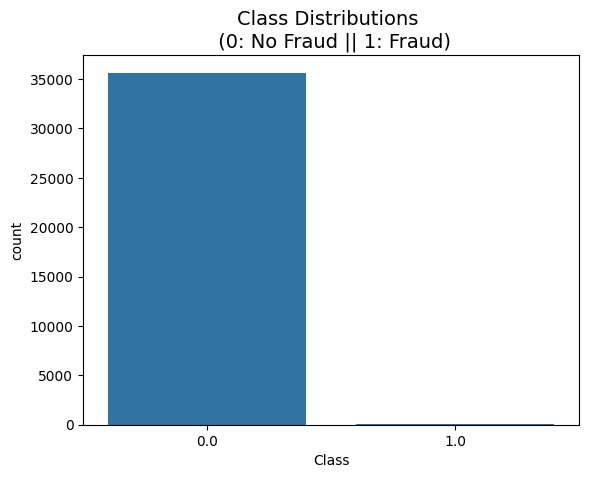

In [19]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [20]:
df = data[['Amount','Class']].copy()
class_0 = df.loc[df['Class'] == 0]['Amount']
class_1 = df.loc[df['Class'] == 1]['Amount']

In [21]:
#Summary of No Fraud
class_0.describe()

count    35638.000000
mean        84.185241
std        227.223359
min          0.000000
25%          7.000000
50%         22.000000
75%         76.000000
max       7879.420000
Name: Amount, dtype: float64

In [22]:
# Summary of Fraud
class_1.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [23]:
# Model Building and Model Evaluatiom
X = data.drop("Class", axis=1)
y = data['Class']

In [24]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

y_train.value_counts()

Class
0.0    28520
1.0       72
Name: count, dtype: int64

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [28]:
y_train.value_counts()

Class
0.0    28520
1.0    28520
Name: count, dtype: int64

In [29]:
from collections import Counter
Counter(y_train)

Counter({0.0: 28520, 1.0: 28520})

In [30]:
Counter(y_test)

Counter({0.0: 7118, 1.0: 7118})

# Model Creation

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred=lr.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7026   92]
 [ 451 6667]]


In [35]:
pd.crosstab(y_test,y_pred)

col_0,0.0,1.0
Class,,
0.0,7026,92
1.0,451,6667


In [36]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

accuracy_score:  0.9618572632762011
recall_score:  0.9366395054790672
precision_score:  0.9863885190116881
f1_score:  0.9608705051524106


# SVC

In [37]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC()

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [39]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

accuracy_score:  0.9341107052542849
recall_score:  0.8732790109581343
precision_score:  0.9942418426103646
f1_score:  0.9298429319371728


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, y_train)
rf_preds = RFR.predict(X_test)

In [42]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

accuracy_score:  0.9341107052542849
recall_score:  0.8732790109581343
precision_score:  0.9942418426103646
f1_score:  0.9298429319371728
